In [8]:
import pandas as pd
df = pd.read_csv('data.csv')
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [42]:
def convert_euro_to_int(value):
    import re
    try:
        m = re.search('(\d+.?\d+)', value)
        v = float(m.group(0))
        multiplier = value[-1:]
        if multiplier == "M":
                return v * 10**6
        if multiplier == "K":
                return v * 10*3
        # No matches for a multiplier
        return v
    except:
        pass
    
    return 0
        
        
df1 = pd.DataFrame(df , columns=['Name', 'Wage', 'Value'])
df1['Value'] = df1['Value'].apply(convert_euro_to_int)
df1['Wage'] = df1['Wage'].apply(convert_euro_to_int)
df1['difference'] = df1['Value'] - df1['Wage']
df1.sort_values('difference', ascending=False)
df1.head()

,Name,Wage,Value,difference
0,L. Messi,16950.0,110500000.0,110483050.0
1,Cristiano Ronaldo,12150.0,77000000.0,76987850.0
2,Neymar Jr,8700.0,118500000.0,118491300.0
3,De Gea,7800.0,72000000.0,71992200.0
4,K. De Bruyne,10650.0,102000000.0,101989350.0


<AxesSubplot:xlabel='Wage', ylabel='Value'>

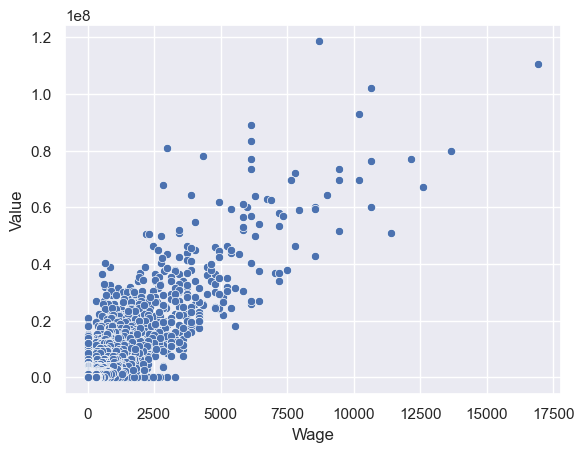

In [44]:
import seaborn as sns
sns.set()
graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph

In [51]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
TOOLTIPS = [
    ('index', '$index'),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")
]

hover = HoverTool(tooltips=TOOLTIPS)
p = figure(title='Undervalued Players', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[hover])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)